<a href="https://www.kaggle.com/code/rewa77/titanic-using-multiple-algorithms?scriptVersionId=146657457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
train= pd.read_csv("../input/titanic/train.csv")
test= pd.read_csv("../input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum() #there is missing values at age, cabin and embarked columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
 test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
 test.isnull().sum() #there is missing values at age, fare and cabin columns 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Visiualization

In [10]:
def barChart(feature):
  surv = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([surv, dead])
  df.index = ['Survived', 'Dead']
  df.plot(kind = 'bar', stacked=True, figsize=(8,4))

barChart function used for plotting survived and dead people based on given feature

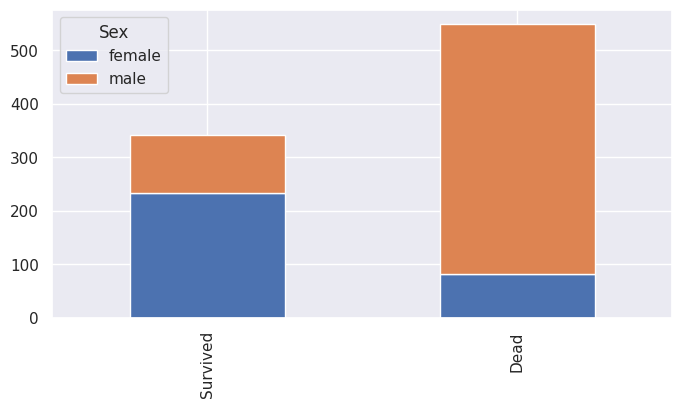

In [11]:
barChart('Sex') #most of survived people are females

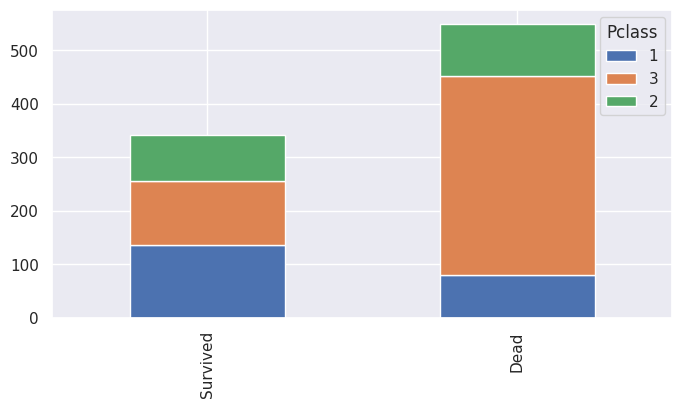

In [12]:
barChart('Pclass') #being in high class as class 1 has higher prob to survive

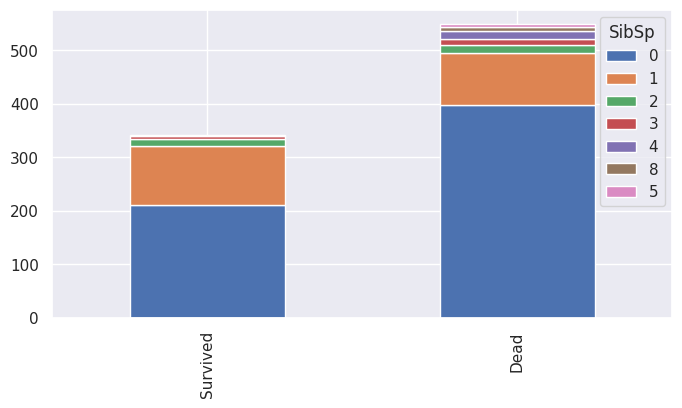

In [13]:
barChart('SibSp') #having no siblings / spouses has higher prob to survive

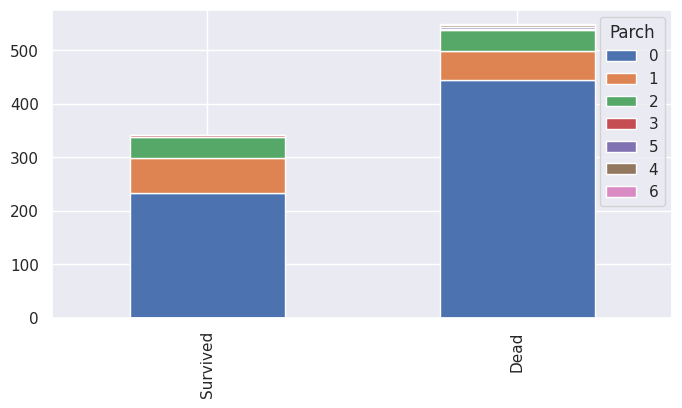

In [14]:
barChart('Parch') #has no parents / children has higher prob to survive 

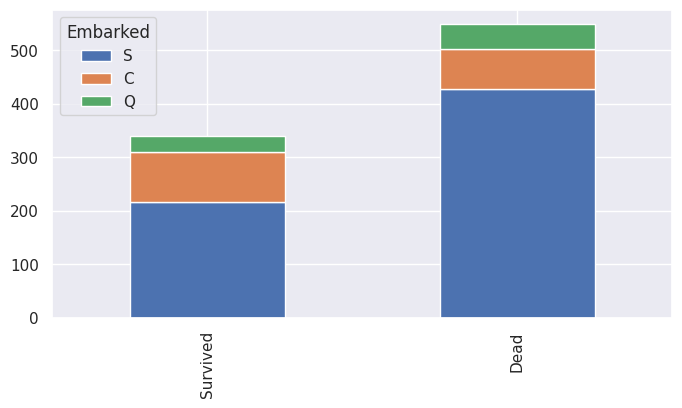

In [15]:
barChart('Embarked') #being from Southampton has higher prob to survive 

<Axes: xlabel='Age'>

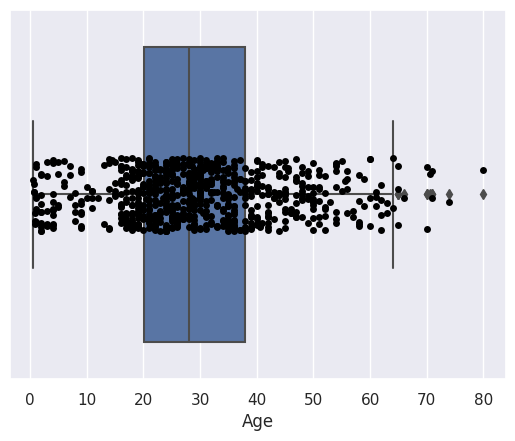

In [16]:
#Outliers
sns.boxplot(x='Age', data = train)
sns.stripplot(x='Age', data = train, color = 'black')

<Axes: xlabel='Pclass'>

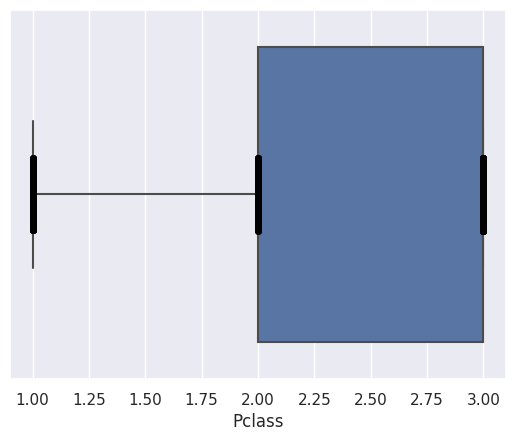

In [17]:
sns.boxplot(x='Pclass', data = train)
sns.stripplot(x='Pclass', data = train, color = 'black')

# Modifying Categorical Columns 

In [18]:
# modifying name column
data = [train, test]
for dataset in data :
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # extract only the title of each name record 

In [19]:
train['Title'].value_counts() #counts the titles we got 

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [20]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [21]:
# replacing each title with a number
titleMapping = {"Mr": 0, "Miss": 1,"Mrs": 2, "Master": 3, "Col" : 3, "Rev": 3, "Ms" : 3, "Dr" : 3, "Dona" : 3,
                 "Mlle":3, "Countess" :3, "Capt":3, "Jonkheer":3, "Don":3, "Mme":3, "Lady":3, "Sir":3, "Major" :3}
for dataset in data :
  dataset['Title'] = dataset['Title'].map(titleMapping)

In [22]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [23]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2


In [24]:
train.drop('Name', axis =1, inplace= True)
test.drop('Name', axis =1, inplace= True)

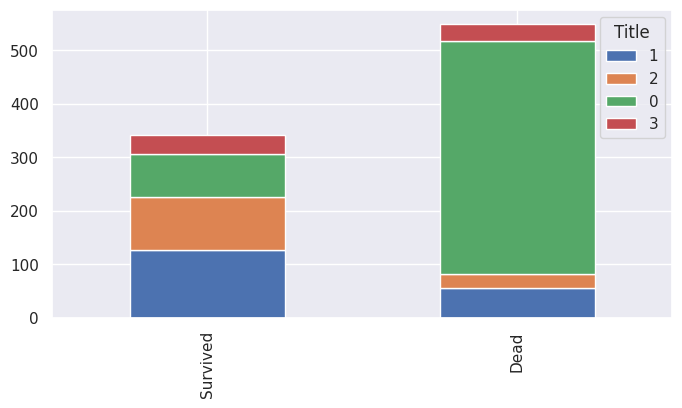

In [25]:
barChart('Title')

In [26]:
#modifying sex column 
train['Sex2'] = train['Sex'].map({'male': '0', 'female': '1'})
test['Sex2'] = test['Sex'].map({'male': '0', 'female': '1'})
train[['Sex', 'Sex2']].head()

,Sex,Sex2
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [27]:
train['Sex2'] = train['Sex2'].astype(int)
test['Sex2'] = test['Sex2'].astype(int)

In [28]:
train.drop('Sex', axis =1, inplace= True)
test.drop('Sex', axis =1, inplace= True)

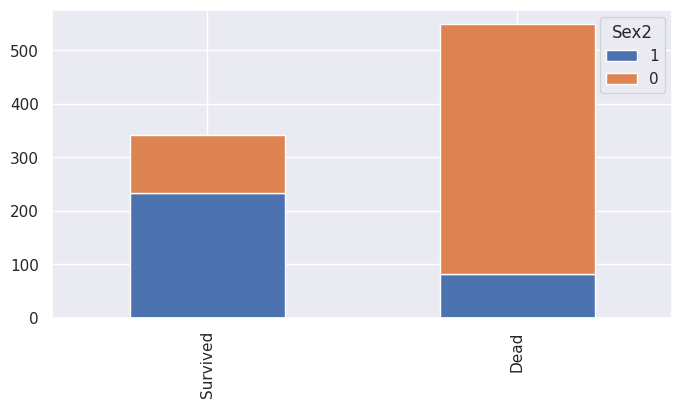

In [29]:
barChart('Sex2')

In [30]:
#modifying the age as replacing missing values with median value
train["Age"].fillna(train.groupby('Pclass')["Age"].transform("median"), inplace = True)
test["Age"].fillna(test.groupby('Pclass')["Age"].transform("median"), inplace = True)

In [31]:
train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex2
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,24.0,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,2.0,3,1,349909,21.0750,NaN,S,3,0
8,9,1,3,27.0,0,2,347742,11.1333,NaN,S,2,1
9,10,1,2,14.0,1,0,237736,30.0708,NaN,C,2,1


In [32]:
#modifying cabin volumn 
print(train.Cabin.isnull().sum() / len(train))
print(test.Cabin.isnull().sum() / len(test)) #almost 80% of data is missing

0.7710437710437711
0.7822966507177034


In [33]:
train.drop('Cabin', axis =1, inplace= True)
test.drop('Cabin', axis =1, inplace= True)

In [34]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Sex2
0,1,0,3,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,2,1


In [35]:
#remove ticket column 
train.drop('Ticket', axis =1, inplace= True)
test.drop('Ticket', axis =1, inplace= True)

In [36]:
#replacing embarked strings into numeric values 
train['Embarked2'] = train['Embarked'].map({'S': '0', 'C': '1', 'Q': '2'})
test['Embarked2'] = test['Embarked'].map({'S': '0', 'C': '1', 'Q': '2'})
train[['Embarked', 'Embarked2']].head()

,Embarked,Embarked2
0,S,0
1,C,1
2,S,0
3,S,0
4,S,0


In [37]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex2,Embarked2
0,1,0,3,22.0,1,0,7.2500,S,0,0,0
1,2,1,1,38.0,1,0,71.2833,C,2,1,1


In [38]:
train.drop('Embarked', axis =1, inplace= True)
test.drop('Embarked', axis =1, inplace= True)

In [39]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex2,Embarked2
0,1,0,3,22.0,1,0,7.2500,0,0,0
1,2,1,1,38.0,1,0,71.2833,2,1,1


In [40]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Sex2           0
Embarked2      2
dtype: int64

In [41]:
#removing missing values 
train= train.dropna(subset=["Embarked2"])
test = train.dropna(subset=["Fare"])
test = train.dropna(subset=["Embarked2"])

<Axes: >

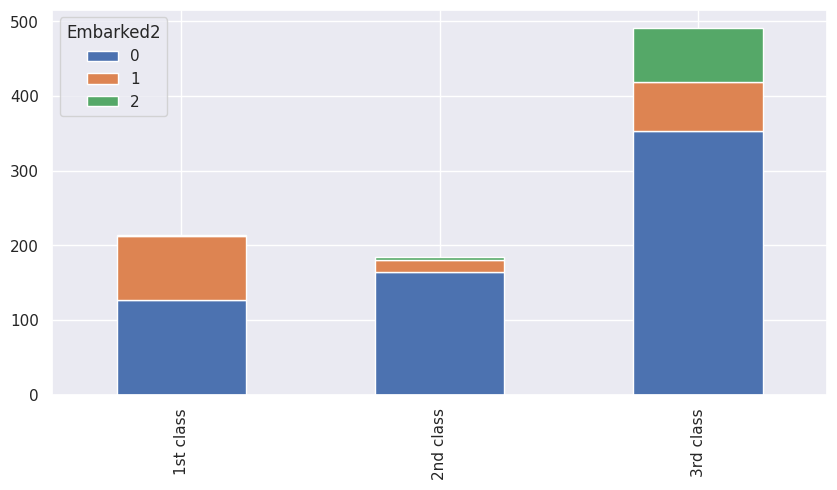

In [42]:
Pclass1 = train[train['Pclass']==1]['Embarked2'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked2'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked2'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [43]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Sex2           0
Embarked2      0
dtype: int64

In [44]:
test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Sex2           0
Embarked2      0
dtype: int64

In [45]:
train.drop('Embarked2', axis =1, inplace= True)
test.drop('Embarked2', axis =1, inplace= True) # dropped it beXGboost model works

# Correlation

In [46]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex2
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703,-0.004301,-0.043136
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,0.444737,0.541585
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,-0.161948,-0.127741
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,-0.123288,-0.083730
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,0.288305,0.116348
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,0.342975,0.247508
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,0.143307,0.179958
Title,-0.004301,0.444737,-0.161948,-0.123288,0.288305,0.342975,0.143307,1.000000,0.557138
Sex2,-0.043136,0.541585,-0.127741,-0.083730,0.116348,0.247508,0.179958,0.557138,1.000000


<Axes: >

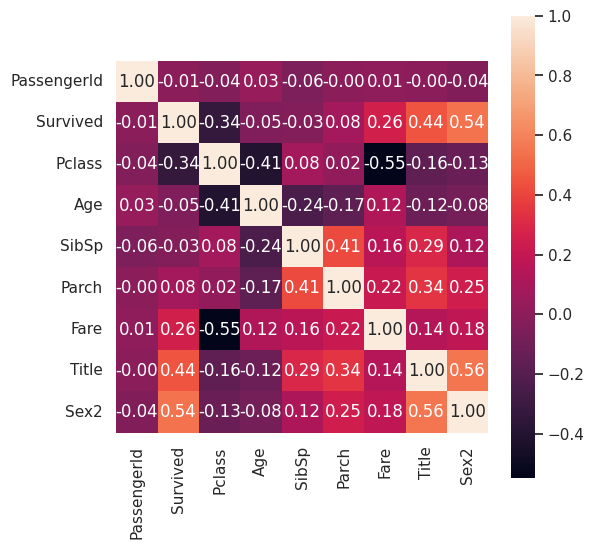

In [47]:
correlation = train.corr()
plt.figure(figsize= (6,6))
sns.heatmap(correlation,square=True, fmt='.2f', annot=True)

# Modelling 

In [48]:
# creating features and label datasets
X = train.drop(columns = ['Survived'])
X.head()
y = train['Survived']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state = 0)

In [50]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,Sex2
364,365,3,24.0,1,0,15.5000,0,0
256,257,1,37.0,0,0,79.2000,2,1
477,478,3,29.0,1,0,7.0458,0,0
272,273,2,41.0,0,1,19.5000,2,1
554,555,3,22.0,0,0,7.7750,1,1
...,...,...,...,...,...,...,...,...
837,838,3,24.0,0,0,8.0500,0,0
193,194,2,3.0,1,1,26.0000,3,0
630,631,1,80.0,0,0,30.0000,0,0
560,561,3,24.0,0,0,7.7500,0,0


In [51]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,Sex2
14,15,3,14.0,0,0,7.8542,1,1
159,160,3,24.0,8,2,69.5500,3,0
763,764,1,36.0,1,2,120.0000,2,1
741,742,1,36.0,1,0,78.8500,0,0
483,484,3,63.0,0,0,9.5875,2,1
...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,3,0
673,674,2,31.0,0,0,13.0000,0,0
182,183,3,9.0,4,2,31.3875,3,0
632,633,1,32.0,0,0,30.5000,3,0


# Decision Tree

In [52]:
#cross validaion (K-Fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [53]:
clf = DecisionTreeClassifier()

In [54]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
print("Prediction :\n", np.round(clf.predict(X_train[:10])))
print("Actual_result :\n", list(y_train[:10]))

Prediction :
 [0 1 0 1 1 0 0 0 0 0]
Actual_result :
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [56]:
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.68539326 0.78651685 0.84269663 0.70786517 0.84269663 0.82022472
 0.82022472 0.71910112 0.80898876 0.75      ]


In [57]:
round(np.mean(score)*100, 2)

77.84

In [58]:
from sklearn.metrics import mean_absolute_error
y_pred= clf.predict(X_test)
clf_rmae = mean_absolute_error(y_test, y_pred)
print("%.2f" %clf_rmae)

0.24


mean absolute error is not high. Decision Tree is good model.

# KNN

In [59]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
print("Prediction :\n", np.round(clf.predict(X_train[:10])))
print("Actual_result :\n", list(y_train[:10]))

Prediction :
 [0 1 0 1 1 0 0 0 0 0]
Actual_result :
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [61]:
scoring = 'accuracy'
score = cross_val_score(knn, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.57303371 0.62921348 0.65168539 0.71910112 0.7752809  0.70786517
 0.66292135 0.61797753 0.5505618  0.54545455]


In [62]:
round(np.mean(score)*100, 2)

64.33

In [63]:
y_pred= knn.predict(X_test)
knn_rmae = mean_absolute_error(y_test, y_pred)
print("%.2f" %knn_rmae)

0.39


Decision Tree is better than KNN as mean absolute error is higher than that in decision tree.

# Random Forest

In [64]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [65]:
print("Prediction :\n", np.round(rf.predict(X_train[:10])))
print("Actual_result :\n", list(y_train[:10]))

Prediction :
 [0 1 0 1 1 0 0 1 0 0]
Actual_result :
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [66]:
scoring = 'accuracy'
score = cross_val_score(rf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75280899 0.79775281 0.85393258 0.78651685 0.87640449 0.76404494
 0.85393258 0.74157303 0.79775281 0.85227273]


In [67]:
round(np.mean(score)*100, 2)

80.77

In [68]:
y_pred= rf.predict(X_test)
rf_rmae = mean_absolute_error(y_test, y_pred)
print("%.2f" %rf_rmae)

0.23


Random Forrst is better than KNN but still Decision Tree is the best so far. 

# SVC

In [69]:
svc = SVC()

In [70]:
C = [0.1, 1, 10]
gamma= [0.01, 0.1, 1 ]
svc_param_grid = {'kernel': ['rbf'],
                  'gamma': gamma,
                  'C': C}

In [71]:
from sklearn.model_selection import GridSearchCV
SVCgs = GridSearchCV(svc,param_grid = svc_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 1, verbose = 1)

SVCgs.fit(X_train,y_train)

SVMC_best = SVCgs.best_estimator_

print(SVMC_best.get_params())

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [72]:
print("Prediction :\n", np.round(SVCgs.predict(X_train[:10])))
print("Actual_result :\n", list(y_train[:10]))

Prediction :
 [0 1 0 1 1 0 0 0 0 0]
Actual_result :
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [73]:
scoring = 'accuracy'
score = cross_val_score(svc, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.60674157 0.65168539 0.64044944 0.74157303 0.68539326 0.6741573
 0.68539326 0.62921348 0.66292135 0.59090909]


In [74]:
round(np.mean(score)*100,2)

65.68

In [75]:
y_pred= SVCgs.predict(X_test)
svc_rmae = mean_absolute_error(y_test, y_pred)
print("%.2f" %svc_rmae)

0.44


SVC is not a good choice at all

# XGboost

In [76]:
xgb = XGBClassifier()

In [77]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [78]:
print("Prediction :\n", np.round(rf.predict(X_train[:10])))
print("Actual_result :\n", list(y_train[:10]))

Prediction :
 [0 1 0 1 1 0 0 1 0 0]
Actual_result :
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [79]:
y_pred = xgb.predict(X_test)
print("Survived", sum(y_pred!=0))
print("Not Survived", sum(y_pred==0))

Survived 67
Not Survived 111


In [80]:
scoring = 'accuracy'
score = cross_val_score(rf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74157303 0.80898876 0.82022472 0.79775281 0.86516854 0.83146067
 0.84269663 0.7752809  0.80898876 0.82954545]


In [81]:
round(np.mean(score)*100, 2)

81.22

In [82]:
y_pred= xgb.predict(X_test)
svc_rmae = mean_absolute_error(y_test, y_pred)
print("%.2f" %svc_rmae)

0.25


In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[86, 19],
       [25, 48]])

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       105
           1       0.72      0.66      0.69        73

    accuracy                           0.75       178
   macro avg       0.75      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178

